In [29]:
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [30]:
# note that in python, multivariat_normal takes the standard deviation sigma
# note that in the lecture notes, it takes the variance sigma**2

mean_x=(0,0)
cov_x=np.identity(2)

x = np.random.multivariate_normal(mean_x, cov_x, 20)
theta=(-1,1)


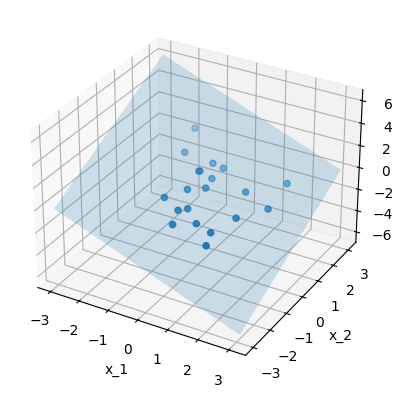

In [ ]:
#sampled 2d points x with label y
#y is sampled according to the linear model with theta=(-1,1)

mean_y=x.dot(theta)
std_y=np.sqrt(0.1)
y=np.random.normal(mean_y,std_y)


x_1,x_2 = np.mgrid[-3:3.1:.01, -3:3.1:.01]
pos = np.dstack((x_1, x_2))

fig0 = plt.figure()
ax0 = fig0.add_subplot(111, projection='3d')
ax0.scatter(x[:,0],x[:,1],y)
ax0.plot3D(x_1, x_2, - x_1 + x_2, alpha=0.2)
ax0.set_xlabel('x_1')
ax0.set_ylabel('x_2')
plt.show()

In [32]:
#prior distribution p(theta)
mean_theta=(0,0)
cov_theta=np.identity(2)
theta_rand=np.random.multivariate_normal(mean_theta,cov_theta)

In [33]:
#posterior distribution p(theta|x,y)
mean_post =cov_theta.dot(np.transpose(x)).dot(np.linalg.inv(std_y**2 * np.identity(20) + x.dot(cov_theta).dot(np.transpose(x)))).dot(y)
cov_post =cov_theta-cov_theta.dot(np.transpose(x)).dot(np.linalg.inv(std_y**2 * np.identity(20)+x.dot(cov_theta).dot(np.transpose(x)))).dot(x).dot(cov_theta)
post=multivariate_normal(mean_post,cov_post)

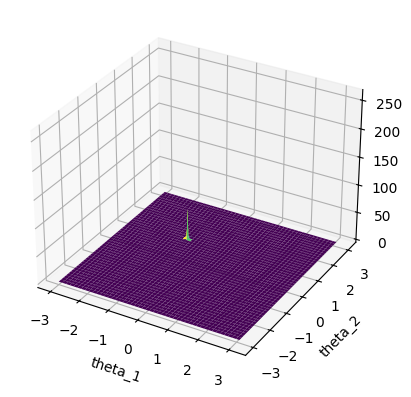

In [34]:
#plot of pdf of posterior for range [-3,3]x[-3,3]
theta_1,theta_2 = np.mgrid[-3:3.1:.01, -3:3.1:.01]
pos = np.dstack((theta_1, theta_2))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(theta_1, theta_2, post.pdf(pos), cmap='viridis')
ax1.set_xlabel('theta_1')
ax1.set_ylabel('theta_2')
plt.show()

In [35]:
#posterior predictive distribution p(y|x,D)

def mean_post_pred(x,mean_post):
    return np.transpose(x).dot(mean_post)

def sigma_post_pred(x,cov_post):
    return std_y**2 + np.transpose(x).dot(cov_post).dot(x)


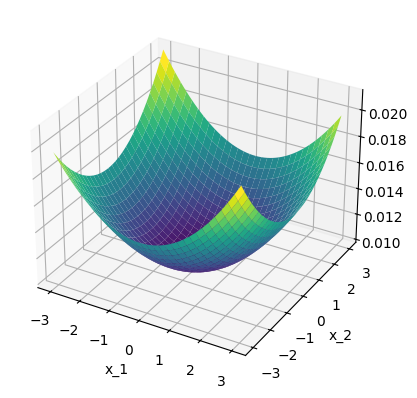

In [36]:
#plotting the variance of the posterior predictive distribution for range [-3,3]x[-3,3]

x_1, x_2 = np.mgrid[-3:3.1:.1, -3:3.1:.1]
pos2 = np.dstack((x_1, x_2))
sigma_post_pred_list = []

for i in range(pos2.shape[0]):
    for j in range(pos2.shape[1]):
        sigma_pred = sigma_post_pred(pos2[i, j],cov_post)
        sigma_post_pred_list.append(sigma_pred)

sigma_post_pred_array = np.array(sigma_post_pred_list).reshape(x_1.shape)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_1, x_2, sigma_post_pred_array, cmap='viridis')
ax2.set_xlabel('x_1')
ax2.set_ylabel('x_2')
plt.show()



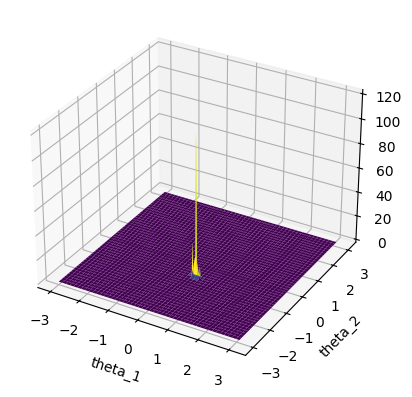

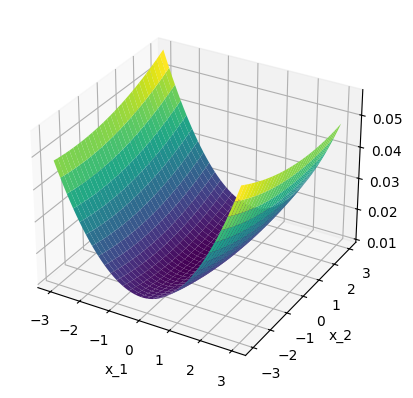

In [37]:
#repeating the same but with a different data x

mean_x=(0,0)
cov_x=[[0.1,0],[0,1]]

x = np.random.multivariate_normal(mean_x, cov_x, 20)
theta=(-1,1)

#posterior distribution p(theta|x,y)
mean_post =cov_theta.dot(np.transpose(x)).dot(np.linalg.inv(std_y**2 * np.identity(20) + x.dot(cov_theta).dot(np.transpose(x)))).dot(y)
cov_post =cov_theta-cov_theta.dot(np.transpose(x)).dot(np.linalg.inv(std_y**2 * np.identity(20)+x.dot(cov_theta).dot(np.transpose(x)))).dot(x).dot(cov_theta)
post=multivariate_normal(mean_post,cov_post)

#plot of pdf of posterior for range [-3,3]x[-3,3]
theta_1,theta_2 = np.mgrid[-3:3.1:.01, -3:3.1:.01]
pos = np.dstack((theta_1, theta_2))

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(theta_1, theta_2, post.pdf(pos), cmap='viridis')
ax3.set_xlabel('theta_1')
ax3.set_ylabel('theta_2')
plt.show()


sigma_post_pred_list = []

for i in range(pos2.shape[0]):
    for j in range(pos2.shape[1]):
        sigma_pred = sigma_post_pred(pos2[i, j],cov_post)
        sigma_post_pred_list.append(sigma_pred)

sigma_post_pred_array = np.array(sigma_post_pred_list).reshape(x_1.shape)

fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(x_1, x_2, sigma_post_pred_array, cmap='viridis')
ax4.set_xlabel('x_1')
ax4.set_ylabel('x_2')
plt.show()


I would say the plots differ, in the spike of where the estimate for theta is. In the first plot, the variance of both components is 1 and thus data is more spread out. This helps to estimate the posterior distribution for theta, where one can see the spike close to [-1,1], which is the true parameter. Through multiple runs of the second plot, we also get a spike but at different location. Data points are closer to the mean (0) in the first coordinate. Thus the model's output, puts more weight on the second component, which leads to a different estimate of theta. 